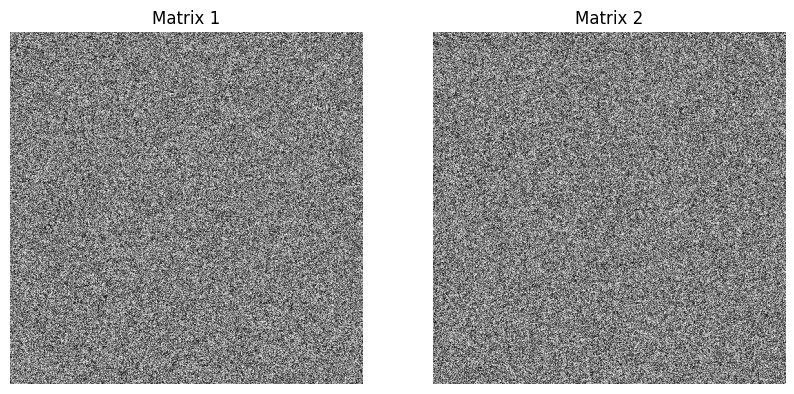

Косинусное сходство: 0.2518
Евклидово расстояние: 625697.34


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

def normalize_image(image):
    """Нормализация изображения для визуализации"""
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Пример создания тестовых матриц (замените своими данными)
hu_matrix1 = np.random.randint(-1000, 2000, (512, 512))  # Матрица 512x512
hu_matrix2 = np.random.randint(-1000, 2000, (512, 512))  # Матрица 512x512

# Визуализация изображений
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(normalize_image(hu_matrix1), cmap='gray')
plt.title('Matrix 1')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(normalize_image(hu_matrix2), cmap='gray')
plt.title('Matrix 2')
plt.axis('off')

plt.show()

# Преобразование матриц в векторы
vector1 = hu_matrix1.flatten()
vector2 = hu_matrix2.flatten()

# Проверка размерности векторов
if vector1.shape != vector2.shape:
    raise ValueError("Матрицы имеют разный размер!")

# Сравнение матриц
cosine_sim = cosine_similarity([vector1], [vector2])[0][0]
print(f"Косинусное сходство: {cosine_sim:.4f}")

euclidean_dist = np.linalg.norm(vector1 - vector2)
print(f"Евклидово расстояние: {euclidean_dist:.2f}")